# AES Differential Side-channel Analysis

#### Coding your own selection function and distinguishers 

<img src='images/DoIt.png' style='width: 100px'>

# ONE SOLUTION

#### Imports

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import matplotlib.pyplot as plt
    
plt.rcParams["figure.figsize"] = [20, 5]

---
<img src='images/DoIt.png' style='width: 100px'>

## Import the traces needed for the analysis

<img src='images/DoIt.png' style='width: 100px'>

#### Load the trace 'AES_traces_set_1st_round.ets'
from SideSCA-Traces-Public: git clone https://github.com/BeneoLix/SideSCA-Traces-Public.git

In [3]:
import estraces

In [5]:
ths = estraces.read_ths_from_ets_file("../SideSCA-Traces-Public/AES_traces_set_1st_round.ets") 

---
<img src='images/DoIt.png' style='width: 100px'>

#### Print the ths information, the ths len


In [6]:
print(ths)

Trace Header Set:
Name.............: ETS Format THS
Reader...........: ETS format reader of file ../SideSCA-Traces-Public/AES_traces_set_1st_round.ets with 2000 traces.
ciphertext.......: uint8
key..............: uint8
plaintext........: uint8



In [7]:
# collect traces, plaintext, key and ciphertext

In [8]:
plaintext_np_array = ths.plaintext
print(type(plaintext_np_array))
print(plaintext_np_array)
plaintext_np_array.shape

<class 'numpy.ndarray'>
[[ 22 171 243 ... 133 132 203]
 [ 79 193  72 ... 198 239  40]
 [ 86 136  48 ...  28  99 187]
 ...
 [156 170 193 ... 115 219 222]
 [127  52 124 ... 128 225 178]
 [132  30  98 ... 241 126  64]]


(2000, 16)

In [9]:
# collect traces, plaintext, key and ciphertext
plaintext_np_array

array([[ 22, 171, 243, ..., 133, 132, 203],
       [ 79, 193,  72, ..., 198, 239,  40],
       [ 86, 136,  48, ...,  28,  99, 187],
       ...,
       [156, 170, 193, ..., 115, 219, 222],
       [127,  52, 124, ..., 128, 225, 178],
       [132,  30,  98, ..., 241, 126,  64]], dtype=uint8)

In [10]:
plaintext_np_array = ths.plaintext
print(type(plaintext_np_array))
print(plaintext_np_array)
plaintext_np_array.shape

<class 'numpy.ndarray'>
[[ 22 171 243 ... 133 132 203]
 [ 79 193  72 ... 198 239  40]
 [ 86 136  48 ...  28  99 187]
 ...
 [156 170 193 ... 115 219 222]
 [127  52 124 ... 128 225 178]
 [132  30  98 ... 241 126  64]]


(2000, 16)

In [11]:
ciphertext_np_array = ths.ciphertext
print(type(ciphertext_np_array))
print(ciphertext_np_array)
ciphertext_np_array.shape

<class 'numpy.ndarray'>
[[ 61  49 209 ... 238 160 148]
 [ 46 249  63 ... 133 129  78]
 [  0  44 100 ... 205 105 195]
 ...
 [  6  30  70 ...  57  68   5]
 [ 81 121 221 ... 207  24 226]
 [255  65 172 ... 201 186  17]]


(2000, 16)

In [12]:
key_np_array = ths.key
print(type(key_np_array))
print(key_np_array)
key_np_array.shape

<class 'numpy.ndarray'>
[[143   3 231 ...  99  78  15]
 [143   3 231 ...  99  78  15]
 [143   3 231 ...  99  78  15]
 ...
 [143   3 231 ...  99  78  15]
 [143   3 231 ...  99  78  15]
 [143   3 231 ...  99  78  15]]


(2000, 16)

In [13]:
traces_np_array = ths.samples
print(type(traces_np_array))
print(traces_np_array)
traces_np_array.shape

<class 'estraces.traces.samples.Samples'>
array([[-20,   8,  30, ...,  14, -40, -29],
       [-20,   8,  30, ...,  11, -40, -29],
       [-20,   8,  30, ...,  14, -40, -29],
       ...,
       [-20,   8,  30, ...,  14, -40, -29],
       [-20,   8,  30, ...,  15, -40, -29],
       [-20,   8,  30, ...,  15, -40, -29]], dtype=int8)


(2000, 3000)

---
<img src='images/DoIt.png' style='width: 100px'>

## Plot and Observe  the traces


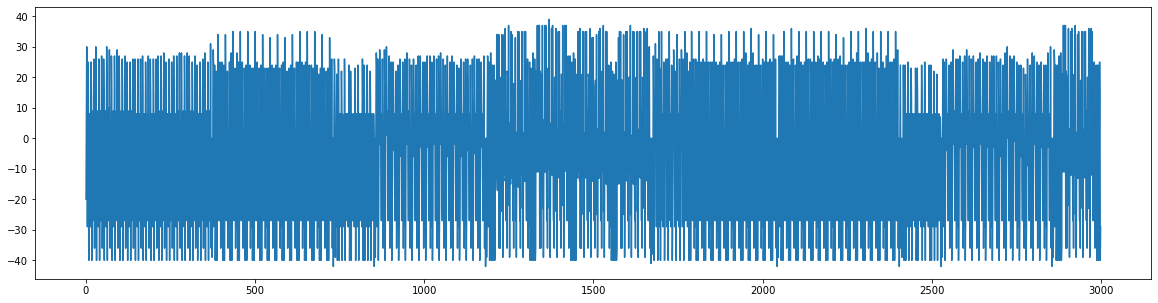

In [14]:
plt.plot(ths[0].samples.T)
plt.show()

----------
<img src='images/DoIt.png' style='width: 100px'>

## Do by your own a side-channel Differential Analysis (DPA)

<img src="./images/openTheDoor.jpeg" width="200px">

### Targeting the intermediate computations in the AES

This attack technique needs to perform guesses on a part of the key (divide-and-conquer approach) and for each guess, knowing the plaintext (resp. the ciphertext) we can compute the intermediate data that is manipulated by the targeted device during the computation. 

Of course only the right guess will lead the values really manipulated by the device.

In that case the DPA attack will succeed and gives the information the guess leading to highest DPA peak matches with the secret key.

<img src="./images/AESscheme.png" width="300px">

#### You can reuse the reverse from TP1 and TP2 to locate the part of the trace that is of interest replacing CPA by DPA and selecting monobit model and a bit (in 0 to 7)

In [15]:
import scared

In [16]:
def aes_function_firstRde_SBout(plaintext, key):
    return scared.aes.encrypt(plaintext = plaintext, key = key, at_round=1, after_step=scared.aes.base.Steps.SUB_BYTES)

In [17]:
container = scared.Container(ths)

In [18]:
Selection_function = scared.reverse_selection_function(aes_function_firstRde_SBout)

In [19]:
Reverse_SB = scared.DPAReverse(selection_function = Selection_function, model = scared.Monobit(0))
Reverse_SB.run(container)

In [20]:
Reverse_SB.results.shape

(16, 3000)

### Plot results

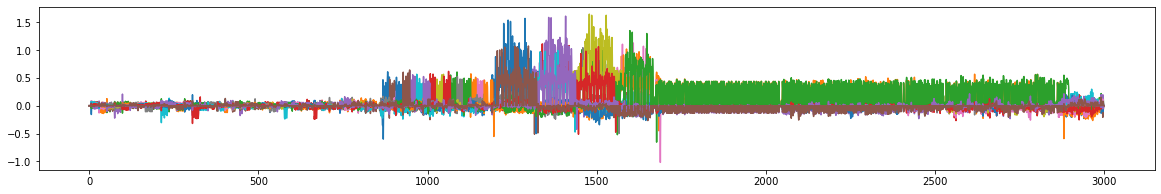

In [21]:
plt.rcParams['figure.figsize']=(20,3)
plt.plot(Reverse_SB.results.T)
plt.show()

-------------
<img src='images/DoIt.png' style='width: 100px'>

### So develop your own DPA selection function 

### Perform the Attack on the first round

Knowing the plaintexts (AES inputs) we know the value given as input to the first AES round.

Performing guesses on each key byte, we can guess all the intermediate values of the first round and and use these values with DPA to exploit the related side-channel traces collected and then perform the attack.

It can be the output of the key addition, the output of the SubBytes operations.

---
Code your own selection function: output of SubBytes at first round

In [22]:
import numpy as _np

SBOX = _np.array([
    0x63, 0x7C, 0x77, 0x7B, 0xF2, 0x6B, 0x6F, 0xC5, 0x30, 0x01, 0x67, 0x2B, 0xFE, 0xD7, 0xAB, 0x76,
    0xCA, 0x82, 0xC9, 0x7D, 0xFA, 0x59, 0x47, 0xF0, 0xAD, 0xD4, 0xA2, 0xAF, 0x9C, 0xA4, 0x72, 0xC0,
    0xB7, 0xFD, 0x93, 0x26, 0x36, 0x3F, 0xF7, 0xCC, 0x34, 0xA5, 0xE5, 0xF1, 0x71, 0xD8, 0x31, 0x15,
    0x04, 0xC7, 0x23, 0xC3, 0x18, 0x96, 0x05, 0x9A, 0x07, 0x12, 0x80, 0xE2, 0xEB, 0x27, 0xB2, 0x75,
    0x09, 0x83, 0x2C, 0x1A, 0x1B, 0x6E, 0x5A, 0xA0, 0x52, 0x3B, 0xD6, 0xB3, 0x29, 0xE3, 0x2F, 0x84,
    0x53, 0xD1, 0x00, 0xED, 0x20, 0xFC, 0xB1, 0x5B, 0x6A, 0xCB, 0xBE, 0x39, 0x4A, 0x4C, 0x58, 0xCF,
    0xD0, 0xEF, 0xAA, 0xFB, 0x43, 0x4D, 0x33, 0x85, 0x45, 0xF9, 0x02, 0x7F, 0x50, 0x3C, 0x9F, 0xA8,
    0x51, 0xA3, 0x40, 0x8F, 0x92, 0x9D, 0x38, 0xF5, 0xBC, 0xB6, 0xDA, 0x21, 0x10, 0xFF, 0xF3, 0xD2,
    0xCD, 0x0C, 0x13, 0xEC, 0x5F, 0x97, 0x44, 0x17, 0xC4, 0xA7, 0x7E, 0x3D, 0x64, 0x5D, 0x19, 0x73,
    0x60, 0x81, 0x4F, 0xDC, 0x22, 0x2A, 0x90, 0x88, 0x46, 0xEE, 0xB8, 0x14, 0xDE, 0x5E, 0x0B, 0xDB,
    0xE0, 0x32, 0x3A, 0x0A, 0x49, 0x06, 0x24, 0x5C, 0xC2, 0xD3, 0xAC, 0x62, 0x91, 0x95, 0xE4, 0x79,
    0xE7, 0xC8, 0x37, 0x6D, 0x8D, 0xD5, 0x4E, 0xA9, 0x6C, 0x56, 0xF4, 0xEA, 0x65, 0x7A, 0xAE, 0x08,
    0xBA, 0x78, 0x25, 0x2E, 0x1C, 0xA6, 0xB4, 0xC6, 0xE8, 0xDD, 0x74, 0x1F, 0x4B, 0xBD, 0x8B, 0x8A,
    0x70, 0x3E, 0xB5, 0x66, 0x48, 0x03, 0xF6, 0x0E, 0x61, 0x35, 0x57, 0xB9, 0x86, 0xC1, 0x1D, 0x9E,
    0xE1, 0xF8, 0x98, 0x11, 0x69, 0xD9, 0x8E, 0x94, 0x9B, 0x1E, 0x87, 0xE9, 0xCE, 0x55, 0x28, 0xDF,
    0x8C, 0xA1, 0x89, 0x0D, 0xBF, 0xE6, 0x42, 0x68, 0x41, 0x99, 0x2D, 0x0F, 0xB0, 0x54, 0xBB, 0x16],
    dtype=_np.uint8)

Version given as example

In [23]:
def my_select_funct_Sbox_out(data, guesses):
    key_bytes_number = data.shape[1]
    guesses_nb = len(guesses)
    S_matrix = np.zeros((len(guesses),len(data),key_bytes_number), dtype = np.uint8)
    key_guesses= np.repeat(np.arange(0,guesses_nb),key_bytes_number).reshape(guesses_nb,key_bytes_number)

    for guess in guesses:    
        for index, plain in enumerate(data):
            S_matrix[guess][index] = np.bitwise_xor(plain, key_guesses[guess])
            
    return np.swapaxes(SBOX[S_matrix], 0, 1)

--------
### Test it

In [24]:
#%%time
S_matrix = my_select_funct_Sbox_out(ths.plaintext, range(256))

In [25]:
print(S_matrix.shape)

(2000, 256, 16)


<img src='images/DoIt.png' style='width: 100px'>

### Use this selection function with scared as distinguisher for DPA to validate your implementation is correct

---
Define it as the selection function to use in attack object

In [26]:
@scared.attack_selection_function
def sel(plaintext, guesses):
    return my_select_funct_Sbox_out(plaintext, guesses)

---
<img src='images/DoIt.png' style='width: 100px'>

Set the leakage model, the distinguisher and discrimant

In [27]:
M = scared.Monobit(0)  #here we select the bit Oth bit the internal values guessed.
# DPA peaks can be positive and negatives, considering the best score requires to take the max value in absolute value.
# The discriminant to use is then: 
d = scared.maxabs

---
🅰️ Set the attack

In [28]:
# define for scared the traces selected as ths earlier
# playing with the number of traces in the ths we can see how many traces are needed

#container = scared.Container(ths)
container = scared.Container(ths[:1000])

In [29]:
attack_dpa = scared.DPAAttack(
                selection_function=sel, 
                model=M, 
                discriminant=d)

---
<img src='images/DoIt.png' style='width: 100px'>

Run it

In [30]:
attack_dpa.run(container)

Now what is the key recovered? 
<br>Compare with the correct one.

In [31]:
found_key = attack_dpa.scores.argmax(0).squeeze()

In [32]:
vhex = np.vectorize(hex)
print("the key found is:   ", vhex(found_key))
print("the correct key is: ", vhex(ths[0].key))


the key found is:    ['0x8f' '0x3' '0xe7' '0x7a' '0xec' '0x66' '0x58' '0xa' '0x13' '0x2b'
 '0xd2' '0x3b' '0xf5' '0x63' '0x4e' '0xf']
the correct key is:  ['0x8f' '0x3' '0xe7' '0x7a' '0xec' '0x66' '0x58' '0xa' '0x13' '0x2b'
 '0xd2' '0x3b' '0xf5' '0x63' '0x4e' '0xf']


In [33]:
np.equal(found_key, ths[0].key)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True])

You can play with the number of traces to use less traces than the full length of ths from now.

We can observe < 1000 traces are enough to recover the key.

---
<img src='images/DoIt.png' style='width: 100px'>

### Print and plot the result

In [34]:
attack_dpa.results.shape

(256, 16, 3000)

### Plot the result


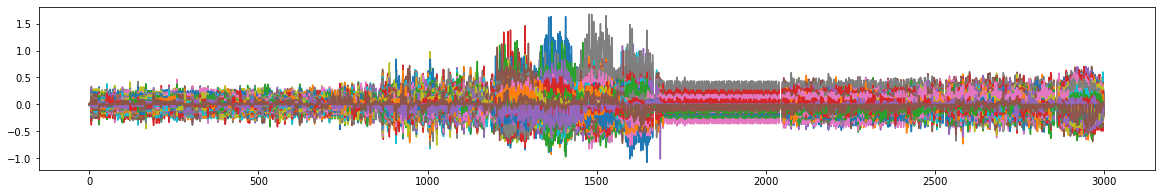

In [35]:
plt.rcParams["figure.figsize"] = [20, 3]
for key_byte_nb in range(16):
    plt.plot(attack_dpa.results.T[:, key_byte_nb, :])
plt.show()

Plot the DPA traces for each key byte, we can also highlight the correct key byte in different color to identify it vs. bad guesses

**We also observe the interesting are in the trace is in the window [1100:1700] and that attacking in this area could be sufficient to recover the key.**

It also corresponds to the SubBytes are in the original collected trace(s) of the AES execution if we look on the power trace(s) collected.

**It might then be relevant to attack in this reduced area of the traces to improve the attack efficiency.**

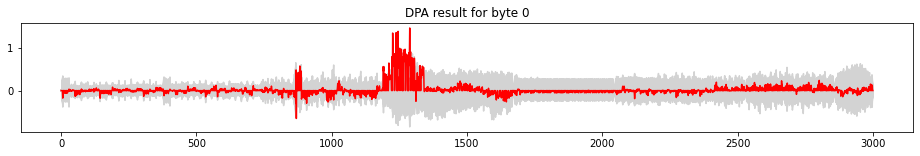

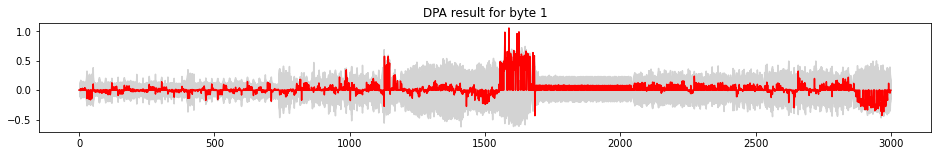

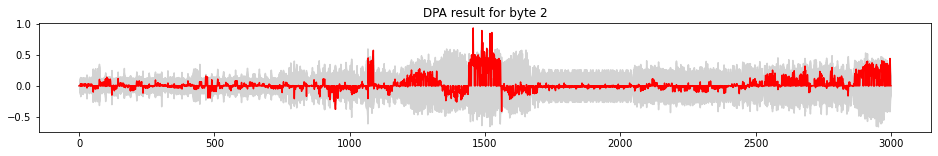

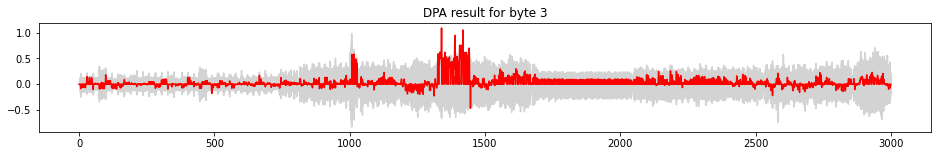

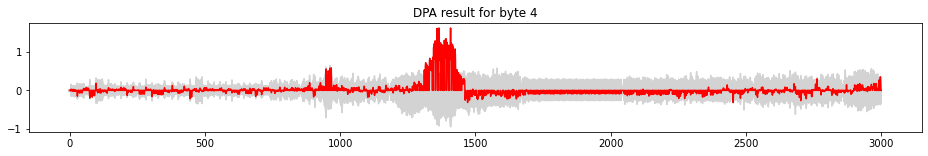

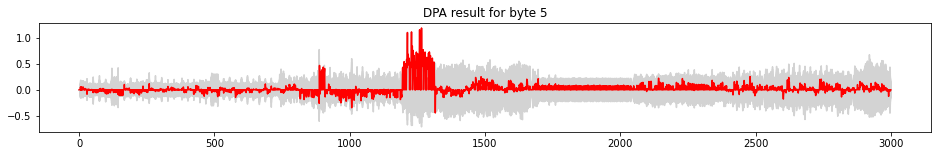

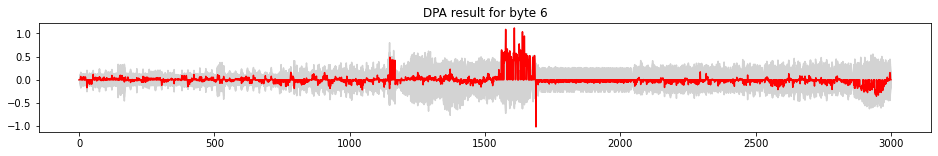

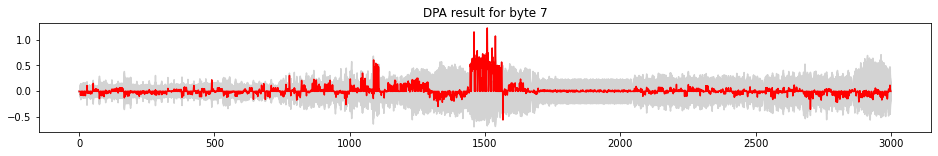

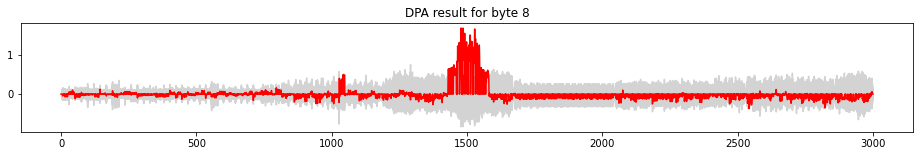

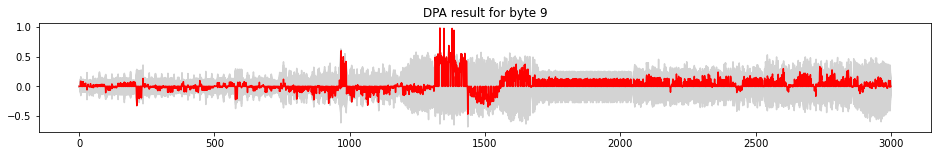

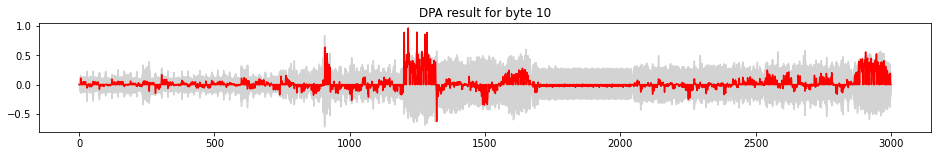

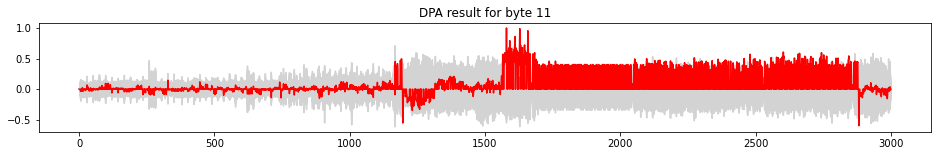

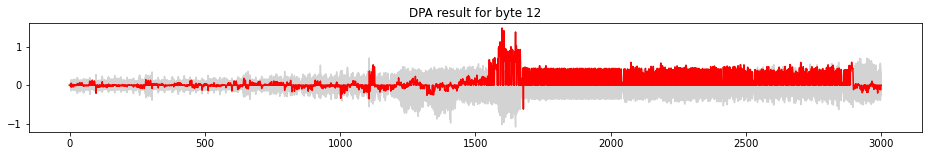

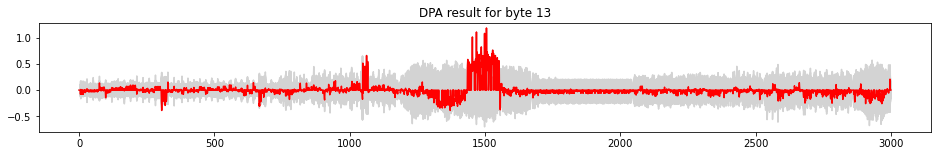

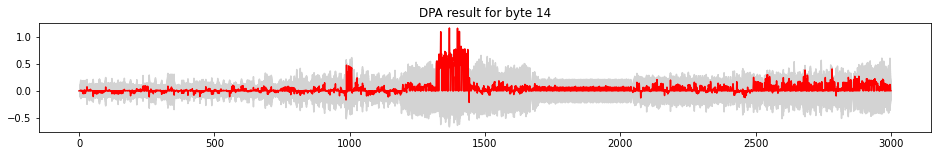

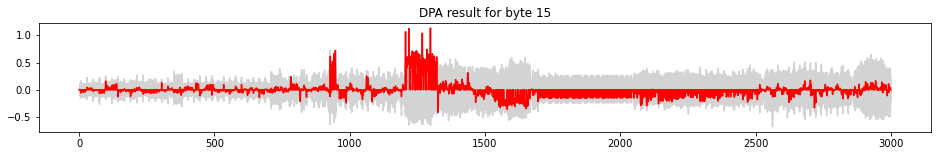

In [36]:
plt.rcParams["figure.figsize"] = [16, 2]
for key_byte_nb in range(16):
    for i in range(256):
        plt.plot(attack_dpa.results[i, key_byte_nb, :], color='lightgrey')
    plt.plot(attack_dpa.results[ths[0].key[key_byte_nb], key_byte_nb, :], color='red')
    plt.title('DPA result for byte '+str(key_byte_nb))
    plt.show()

-------------
<img src='images/DoIt.png' style='width: 100px'>

### Doing your own distinguisher for DPA

---
🅰️ Do your own Difference of Mean on traces for a given guess and selection function

In [37]:
#given as example
def compute_DoM(ths, selection_function_matrix, guess_value, key_byte):
    #create the two partitions for the DoM
    set_DoM = np.zeros((2,len(ths[0:1].samples.T)), dtype=np.float32)   
    matrix = selection_function_matrix >> 7   # if bit selected for SPA is 0th 
    sel_array_1 = matrix[:,guess_value,key_byte]
    cpt_1 = np.sum(sel_array_1)
    cpt_0 = int(len(ths)-cpt_1)
        
    for index, trace in enumerate(ths.samples):
        set_DoM[sel_array_1[index]] += trace 
    
    DoM_res = (set_DoM[1]/cpt_1) - (set_DoM[0]/cpt_0)    

    return(DoM_res)

---
🅰️ Apply the DoM on the correct key byte value in position 0

In [38]:
byte_key_position = 0
correct_keybyte_0 = ths[0:1].key[0,byte_key_position]
print(correct_keybyte_0)

143


In [39]:
DoM_correct_keybyte = compute_DoM(ths, S_matrix, correct_keybyte_0, byte_key_position)

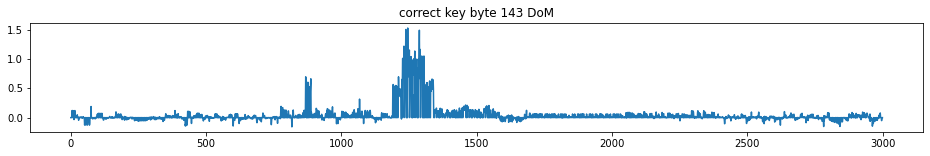

In [40]:
plt.plot(DoM_correct_keybyte)
plt.title("correct key byte " + str(correct_keybyte_0) + " DoM")
plt.show()

---
🅰️ Apply the DoM on an incorrect key byte value in position 0

In [41]:
uncorrect_keybyte_0 = 12 # as example 
DoM_uncorrect_keybyte = compute_DoM(ths, S_matrix, uncorrect_keybyte_0, byte_key_position)

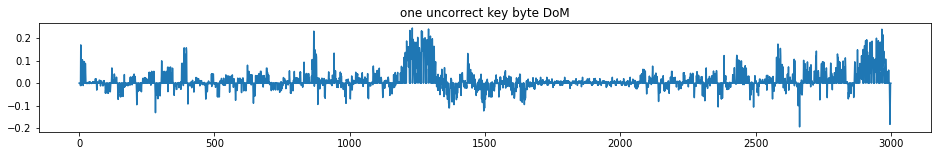

In [42]:
plt.plot(DoM_uncorrect_keybyte)
plt.title("one uncorrect key byte DoM")
plt.show()

---
🅰️ Do your own DPA for several guesses

In [43]:
import tqdm

In [44]:
def compute_DPA_1keybyte(ths, selection_function_matrix, key_byte, guesses_range):    
    dpa_traces = []
    for i in tqdm.tnrange(len(guesses_range)):
        dpa_traces.append(compute_DoM(ths,selection_function_matrix , guesses_range[i], key_byte))
    return(dpa_traces)


---
🅰️ Test it

In [45]:
%%time
nb_traces = 750 #to test on 750 traces only
#nb_traces = len(ths) #to test on full traces set
byte_key_position = 0
guesses_range = range(256)
DPA_result_1keybyte = compute_DPA_1keybyte(ths[0:nb_traces], S_matrix[0:nb_traces], byte_key_position, guesses_range)

/Users/bfeix/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: TqdmDeprecationWarning: Please use `tqdm.notebook.trange` instead of `tqdm.tnrange`
  This is separate from the ipykernel package so we can avoid doing imports until



CPU times: user 1min 37s, sys: 15.9 s, total: 1min 53s
Wall time: 1min 56s


---
🅰️ Plot the resulting traces

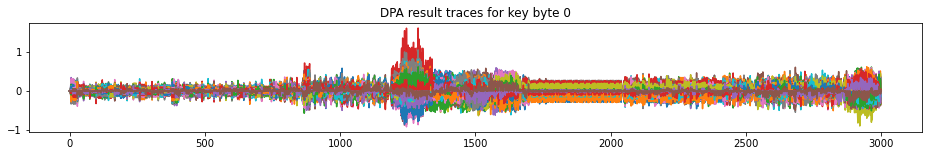

In [47]:
for i in range(len(guesses_range)):
    plt.plot(DPA_result_1keybyte[i].T)
plt.title("DPA result traces for key byte "+str(byte_key_position))
plt.show()

In [48]:
dpa_scores = []
for i in range(256):
    dpa_scores.append(np.max(DPA_result_1keybyte[i]))
found_key_byte = np.argmax(np.array(dpa_scores))
print("recovered key byte position 0 = "+ str(hex(found_key_byte)))
print("Correct key byte position 0 = "+ str(hex(ths[0].key[0])))
if (found_key_byte == ths[0].key[0]): print("success")
else: print("Byte not recovered")

recovered key byte position 0 = 0x8f
Correct key byte position 0 = 0x8f
success


---
🅰️ Perform the DPA on 16 bytes of key and recover the full key of the AES

In [49]:
# example
def compute_DPA_full(ths, selection_function_matrix, guesses_range):    
    dpa_result = np.zeros((16,256,len(ths[0].samples)), dtype=np.float32)
    dpa_scores = np.zeros((16,256), dtype=np.float32)
    found_key = np.zeros(16, dtype=np.uint8)

    for key_byte_nb in tqdm.notebook.trange(16):
        for guess in guesses_range:
            dpa_result[key_byte_nb,guess]= compute_DoM(ths,selection_function_matrix , guess, key_byte_nb)
            dpa_scores[key_byte_nb, guess] = np.max(np.abs(dpa_result[key_byte_nb, guess]))
        found_key[key_byte_nb] = np.argmax(dpa_scores[key_byte_nb])

    return(dpa_result, dpa_scores, found_key)

In [50]:
nb_traces = 1000
(dpa_result, dpa_scores, found_key) = compute_DPA_full(ths[0:nb_traces], S_matrix[0:nb_traces], range(256))

You can plot like this:

In [51]:
#for key_byte in range(16):
#    plt.rcParams['figure.figsize']=(16,2)
#    plt.plot(dpa_result[key_byte].T)
#    plt.title("DPA result traces for key byte "+str(key_byte))
#    plt.show()
#    print("recovered key byte position 0 = "+ str(hex(found_key[key_byte])))
#    print("Correct key byte position 0 = "+ str(hex(ths[0].key[key_byte])))
#    if (found_key[key_byte] == ths[0].key[key_byte]): print("success")
#    else: print("Byte not recovered")

or like this:

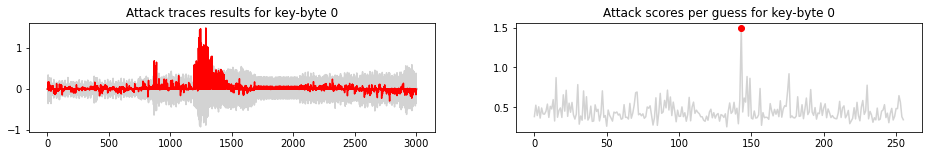

recovered key byte position 0 = 0x8f
Correct key byte position 0 = 0x8f
success


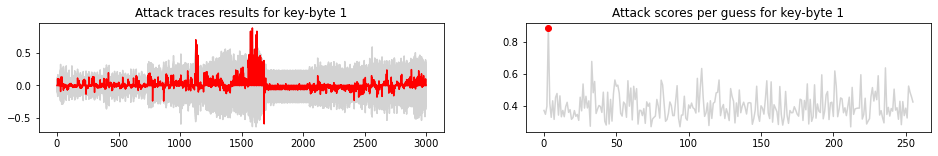

recovered key byte position 0 = 0x3
Correct key byte position 0 = 0x3
success


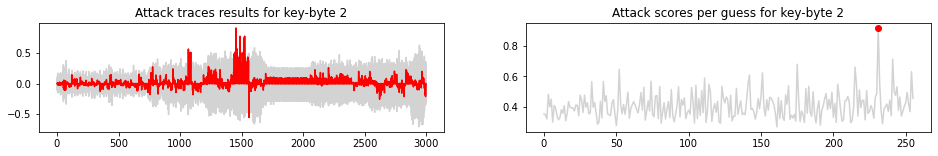

recovered key byte position 0 = 0xe7
Correct key byte position 0 = 0xe7
success


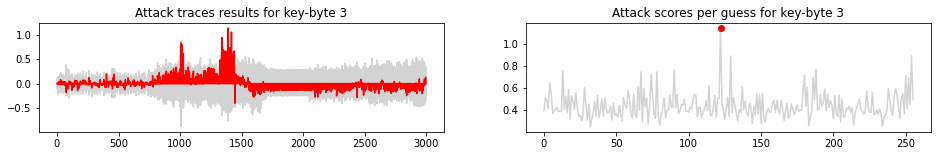

recovered key byte position 0 = 0x7a
Correct key byte position 0 = 0x7a
success


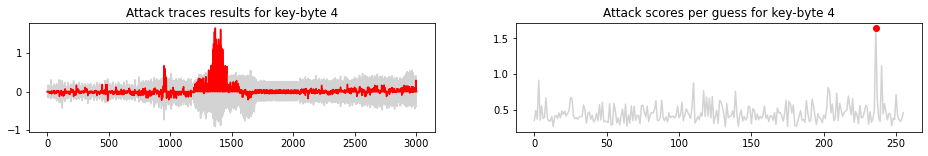

recovered key byte position 0 = 0xec
Correct key byte position 0 = 0xec
success


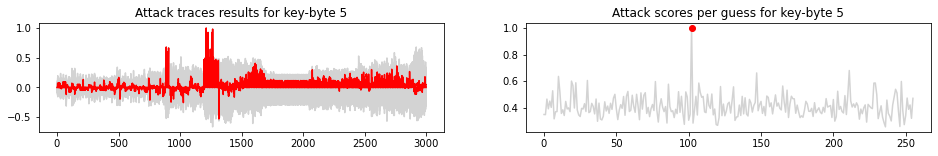

recovered key byte position 0 = 0x66
Correct key byte position 0 = 0x66
success


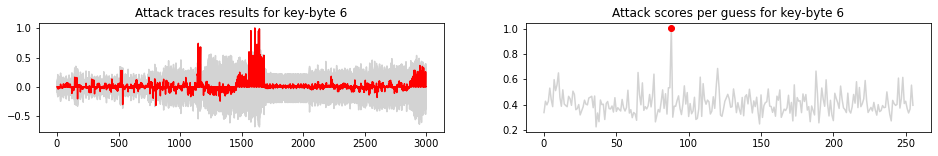

recovered key byte position 0 = 0x58
Correct key byte position 0 = 0x58
success


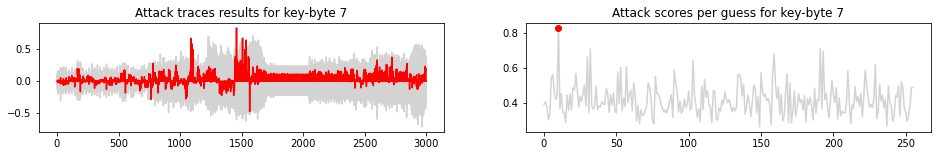

recovered key byte position 0 = 0xa
Correct key byte position 0 = 0xa
success


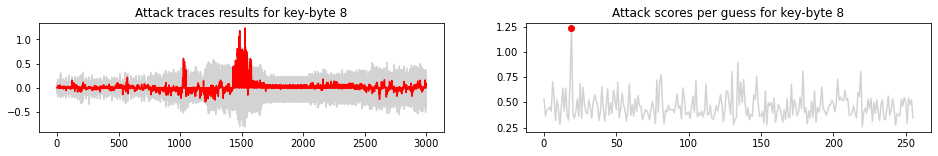

recovered key byte position 0 = 0x13
Correct key byte position 0 = 0x13
success


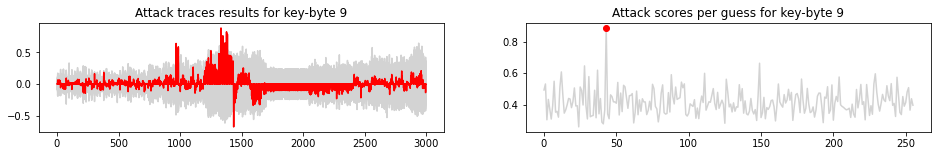

recovered key byte position 0 = 0x2b
Correct key byte position 0 = 0x2b
success


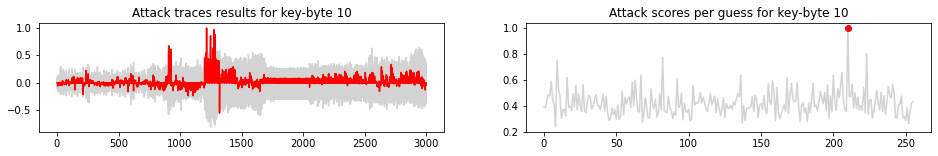

recovered key byte position 0 = 0xd2
Correct key byte position 0 = 0xd2
success


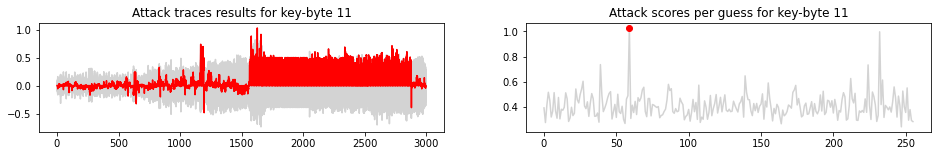

recovered key byte position 0 = 0x3b
Correct key byte position 0 = 0x3b
success


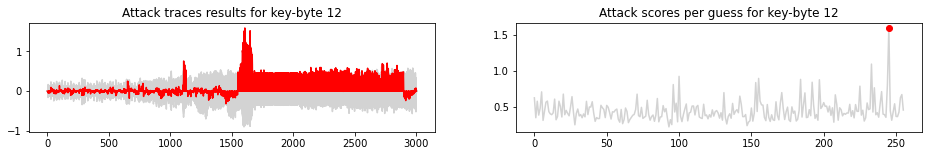

recovered key byte position 0 = 0xf5
Correct key byte position 0 = 0xf5
success


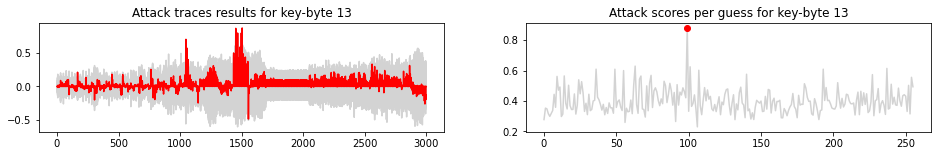

recovered key byte position 0 = 0x63
Correct key byte position 0 = 0x63
success


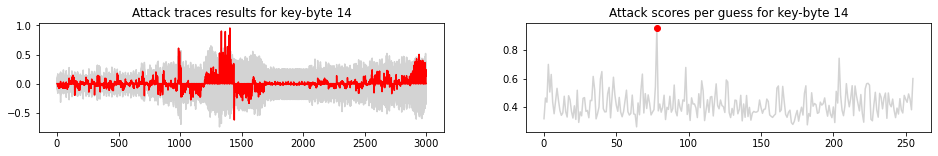

recovered key byte position 0 = 0x4e
Correct key byte position 0 = 0x4e
success


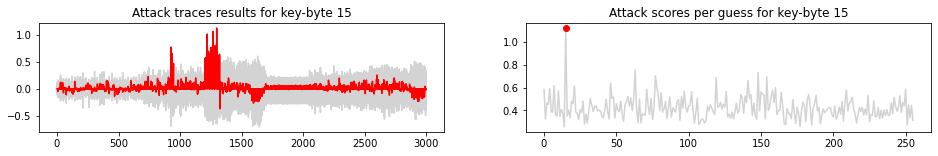

recovered key byte position 0 = 0xf
Correct key byte position 0 = 0xf
success


In [52]:
for key_byte in range(16):
    plt.rcParams['figure.figsize']=(16,2)
    
    plt.subplot(1,2,1)
    plt.title('Attack traces results for key-byte '+str(key_byte))
    for guess in range(256): plt.plot(dpa_result[key_byte,guess], color='Lightgrey')
    plt.plot(dpa_result[key_byte, ths[0].key[key_byte]], color='red')

    plt.subplot(1,2,2)
    plt.title('Attack scores per guess for key-byte '+str(key_byte))
    plt.plot(dpa_scores[key_byte,:], color='Lightgrey')
    plt.plot(ths[0].key[key_byte], dpa_scores[key_byte, ths[0].key[key_byte]], "o", color = 'red')

    plt.show()

    print("recovered key byte position 0 = "+ str(hex(found_key[key_byte])))
    print("Correct key byte position 0 = "+ str(hex(ths[0].key[key_byte])))
    if (found_key[key_byte] == ths[0].key[key_byte]): print("success")
    else: print("Byte not recovered")


### Is the key recovered the correct key ?

In [53]:
print("found key is   :", found_key)
print("correct key is :", ths[0].key)

np.equal(found_key, ths[0].key)

found key is   : [143   3 231 122 236 102  88  10  19  43 210  59 245  99  78  15]
correct key is : [143   3 231 122 236 102  88  10  19  43 210  59 245  99  78  15]


array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True])

### We have recovered the key using 1000 traces with our own DPA code implementation.